In [1]:
import torch.nn as nn
import torch

import sys, os
import random
import numpy as np
from shutil import copy
import matplotlib.pyplot as plt
from copy import deepcopy

from omegaconf import OmegaConf
import shutil
import pickle
import random
from tqdm import tqdm

from torchvision.datasets.folder import ImageFolder
from torch.utils.data import DataLoader
# from skimage.filters import threshold_local, gaussian

import pdb

In [2]:
# run_path = '/home/harishbabu/projects/PIPNet/runs/010-CUB-27-imgnet_OOD_cnext26_img=224_nprotos=20'
# run_path = '/home/harishbabu/projects/PIPNet/runs/031-CUB-18-imgnet_cnext26_img=224_nprotos=20_orth-on-rel'
# run_path = '/home/harishbabu/projects/PIPNet/runs/032-CUB-18-imgnet_cnext26_img=224_nprotos=20_orth-on-rel'

# run_path = '/home/harishbabu/projects/PIPNet/runs/035-CUB-18-imgnet_OOD_cnext26_img=224_nprotos=20_orth-on-rel'

# run_path = '/home/harishbabu/projects/PIPNet/runs/043-035_clone-CUB-18-imgnet_OOD_cnext26_img=224_nprotos=20_orth-on-rel'
# run_path = "/home/harishbabu/projects/PIPNet/runs/036-CUB-18-imgnet_OOD_cnext26_img=224_nprotos=20_orth-on-rel_uniformity"
# run_path = "/home/harishbabu/projects/PIPNet/runs/041-035_clone-CUB-18-imgnet_OOD_cnext26_img=224_nprotos=20_orth-on-rel"
# run_path = "/home/harishbabu/projects/PIPNet/runs/042-035_clone-CUB-18-imgnet_OOD_cnext26_img=224_nprotos=20_orth-on-rel"

# run_path = "/home/harishbabu/projects/PIPNet/runs/044-CUB-18-imgnet_OOD_cnext26_img=224_nprotos=20-or-4per-desc_orth-on-rel"

# run_path = "/home/harishbabu/projects/PIPNet/runs/046-CUB-18-imgnet_OOD_cnext26_img=224_nprotos=10per-desc_orth-on-rel"
# run_path = "/home/harishbabu/projects/PIPNet/runs/047-CUB-18-imgnet_OOD_cnext26_img=224_nprotos=5per-desc_tanh-desc"
# run_path = "/home/harishbabu/projects/PIPNet/runs/048-CUB-18-imgnet_OOD_cnext26_img=224_nprotos=5per-desc_tanh-desc_unit-sphere"
# run_path = "/home/harishbabu/projects/PIPNet/runs/051-CUB-18-imgnet_cnext26_img=224_nprotos=4per-desc_tanh-desc_unit-sphere_AW=5-TW=2-UW=2-CW=2"
# run_path = "/home/harishbabu/projects/PIPNet/runs/052-CUB-18-imgnet_OOD_cnext26_img=224_nprotos=4per-desc_tanh-desc_unit-sphere_AW=5-TW=2-UW=2-CW=2"
# run_path = "/home/harishbabu/projects/PIPNet/runs/055-CUB-18_cnext26_img=224_nprotos=4per-desc_unit-sphere_no-softmax_AW=3-TW=2-UW=3-CW=2"
# run_path = "/home/harishbabu/projects/PIPNet/runs/056-CUB-18-imgnet_cnext26_img=224_nprotos=4per-desc_unit-sphere_no-softmax_AW=3-TW=2-UW=3-CW=2"
# run_path = "/home/harishbabu/projects/PIPNet/runs/057-CUB-18-imgnet_cnext26_img=224_nprotos=4per-desc_unit-sphere_no-meanpool_no-softmax_AW=3-TW=2-UW=3-CW=2"
# run_path = "/home/harishbabu/projects/PIPNet/runs/058-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere_no-meanpool_no-softmax_AW=3-TW=2-UW=3-CW=2"

# with unit sphere
# run_path = "/home/harishbabu/projects/PIPNet/runs/059-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere_finetune=5_no-meanpool_no-softmax_AW=3-TW=2-UW=3-CW=2_batch=20"

# unit sphere with softmax
# run_path = "/home/harishbabu/projects/PIPNet/runs/065-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere_finetune=5_no-meanpool_with-softmax_AW=3-TW=2-UW=3-CW=2_batch=20"

# original hpipnet with 20 protos per node no KO, no OOD, no tanh-desc
# run_path = "/home/harishbabu/projects/PIPNet/runs/062-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=20_no-KO_no-OOD"

# original hpipnet with 20 protos per node no KO, no OOD, WITH tanh-desc
# run_path = "/home/harishbabu/projects/PIPNet/runs/063-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=20_no-KO_no-OOD_tanh-desc"

# with unit sphere but no AL+UNI
# run_path = "/home/harishbabu/projects/PIPNet/runs/066-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere_finetune=5_no-meanpool_no-softmax_no-align_no-uni_AW=3-TW=2-UW=3-CW=2_batch=20"

# with unit sphere, protopool, with softmax, no tanh-desc
# run_path = "/home/harishbabu/projects/PIPNet/runs/067-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere-protopool_finetune=5_no-meanpool_with-softmax_AW=3-TW=2-UW=3-CW=2_batch=20"

# with unit sphere, protopool, with softmax, no tanh-desc, INCORRECT
# run_path = "/home/harishbabu/projects/PIPNet/runs/067-incorrect-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere-protopool_finetune=5_no-meanpool_with-softmax_AW=3-TW=2-UW=3-CW=2_batch=20"

# with unit sphere, protopool, no softmax, no tanh-desc
# run_path = "/home/harishbabu/projects/PIPNet/runs/068-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere-protopool_finetune=5_no-meanpool_no-softmax_AW=3-TW=2-UW=3-CW=2_batch=20"

# 071 with bias
# run_path = "/home/harishbabu/projects/PIPNet/runs/071-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere-protopool_finetune=5_no-meanpool_with-softmax_with-addon-bias_AW=3-TW=2-UW=3-CW=2_batch=20"

# 072 gumbel softmax
# run_path = "/home/harishbabu/projects/PIPNet/runs/072-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere-protopool_finetune=5_no-meanpool_with-gumbel-softmax_no-addon-bias_AW=3-TW=2-UW=3-CW=2_batch=20"

# 073 gumbel softmax, tau-1.0
# run_path = "/home/harishbabu/projects/PIPNet/runs/073-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere-protopool_finetune=5_no-meanpool_with-gumbel-softmax-tau=1_no-addon-bias_AW=3-TW=2-UW=3-CW=2_batch=20"

# 075 068 with focal loss
# run_path = "/home/harishbabu/projects/PIPNet/runs/075-068-with-focal_CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere-protopool_finetune=5_no-meanpool_no-softmax_no-addon-bias_AW=3-TW=2-UW=3-CW=2_batch=20"

# 076 cs followed by softmax. Uses align_pf along with align+uni
# run_path = "/home/harishbabu/projects/PIPNet/runs/076_CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere-protopool_finetune=5_align-pf-during-training_no-meanpool_no-softmax_no-addon-bias_AW=3-TW=2-UW=3-CW=2-APW=5_batch=20"

# 074 multiply_cs_softmax
# run_path = "/home/harishbabu/projects/PIPNet/runs/074-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere-protopool_finetune=5_no-meanpool_with-softmax_multi-cs-softmax_no-addon-bias_AW=3-TW=2-UW=3-CW=2_batch=20"

# 077 unit sphere protopool with cosin no softmax constant 20 protos per node
# run_path = "/home/harishbabu/projects/PIPNet/runs/077_CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=20-sphere-protopool_finetune=5_align-pf-during-training_no-meanpool_no-softmax_no-addon-bias_AW=3-TW=2-UW=3-CW=2_batch=20"

# 082 unit sphere cs followed by softmax with minmazimize loss
# run_path = "/home/harishbabu/projects/PIPNet/runs/082-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-leaf-desc_unit-sphere_finetune=5_no-meanpool_with-softmax_no-addon-bias_AW=3-TW=2-MMW=2-UW=3-CW=2_mm-loss_batch=48"

# 083 unit sphere cs followed by softmax with minmazimize loss
# run_path = "/home/harishbabu/projects/PIPNet/runs/083-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-leaf-desc_unit-sphere_finetune=5_no-meanpool_with-softmax_no-addon-bias_AW=3-TW=2-MMW=2-UW=3-CW=2_no-align_no-uni_no-mm-loss_batch=48"

# 085 unit sphere cs followed by softmax-with-tau with minmazimize loss
# run_path = "/home/harishbabu/projects/PIPNet/runs/085-notebook-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-leaf-desc_unit-sphere_finetune=5_no-meanpool_with-softmax-tau=0.2_no-addon-bias_AW=3-TW=2-MMW=2-UW=3-CW=2_mm-loss_batch=12"

# 091 basic gaussian multiplier on stage 4
# run_path = "/home/harishbabu/projects/PIPNet/runs/091-CUB-18-imgnet_with-equalize-aug_cnext26_BGM=4|1.0|50_img=224_latent-dim=256_nprotos=4per-leaf-desc_unit-sphere_finetune=5_no-meanpool_with-softmax-tau=0.2_no-addon-bias_AW=3-TW=2-MMW=2-UW=3-CW=2_mm-loss_batch=48"

# 092 basic gaussian multiplier on stage 3, 4
# run_path = "/home/harishbabu/projects/PIPNet/runs/092-CUB-18-imgnet_with-equalize-aug_cnext26_BGM=3,4|1.0|50_img=224_latent-dim=256_nprotos=4per-leaf-desc_unit-sphere_finetune=5_no-meanpool_with-softmax-tau=0.2_no-addon-bias_AW=3-TW=2-MMW=2-UW=3-CW=2_mm-loss_batch=48"

# 093 128 dim linear
# run_path = "/home/harishbabu/projects/PIPNet/runs/093-CUB-18-imgnet_with-equalize-aug_cnext26_BGM=4|1.0|50_img=224_latent-dim=128_nprotos=20_unit-sphere_finetune=5_no-meanpool_with-softmax-tau=0.2_no-addon-bias_AW=3-TW=2-MMW=2-UW=1-CW=2_mm-loss_batch=48"

# 094 128 dim linear
# run_path = "/home/harishbabu/projects/PIPNet/runs/094-CUB-18-imgnet_with-equalize-aug_cnext26_BGM=4|1.0|50_img=224_latent-dim=128_nprotos=20_unit-sphere_finetune=5_no-meanpool_with-softmax-tau=0.2_no-addon-bias_AW=3-TW=2-MMW=2-UW=1-CW=2_mm-loss_batch=48"

# 095 ablation 091 without AL+UNI
# run_path = "/home/harishbabu/projects/PIPNet/runs/095-091-woALUNI-CUB-18-imgnet_with-equalize-aug_cnext26_BGM=4|1.0|50_img=224_nprotos=4per-leaf-desc_unit-sphere_finetune=5_no-meanpool_with-softmax-tau=0.2_no-addon-bias_AW=3-TW=2-MMW=2-UW=3-CW=2_no-AL_no-UNI_mm-loss_batch=48"

# 096 ablation 091 without AL+UNI
# run_path = "/home/harishbabu/projects/PIPNet/runs/096-091-wfocal-CUB-18-imgnet_with-equalize-aug_cnext26_BGM=4|1.0|50_img=224_nprotos=4per-leaf-desc_unit-sphere_finetune=5_no-meanpool_with-softmax-tau=0.2_no-addon-bias_AW=3-TW=2-MMW=2-UW=3-CW=2_mm-loss_batch=48"

# 097 - 091 with bg
# run_path = "/home/harishbabu/projects/PIPNet/runs/097-091-wbg-CUB-18_with-equalize-aug_cnext26_BGM=4|1.0|50_img=224_nprotos=4per-leaf-desc_unit-sphere_finetune=5_no-meanpool_with-softmax-tau=0.2_no-addon-bias_AW=3-TW=2-MMW=2-UW=3-CW=2_mm-loss_batch=48"

# 0100 cub29 with 20 per node
# run_path = "/home/harishbabu/projects/PIPNet/runs/100_CUB-29-imgnet_with-equalize-aug_cnext26_BGM=4|1.0|50_img=224_nprotos=20_unit-sphere-protopool_no-meanpool_with-softmax-tau=0.2_no-addon-bias_AW=3-TW=2-MMW=2-UW=3-CW=2_mm-loss_batch=48"

# 0101 baseline with 4 per desc per node
# run_path = "/home/harishbabu/projects/PIPNet/runs/101-baseline-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_no-KO_no-OOD"

# 0103 091 with 20 per node
# run_path = "/home/harishbabu/projects/PIPNet/runs/103-091-wProtoPool20PerNode_CUB-18-imgnet_with-equalize-aug_cnext26_BGM=4|1.0|50_img=224_nprotos=20_unit-sphere-protopool_no-meanpool_with-softmax-tau=0.2_no-addon-bias_AW=3-TW=2-MMW=2-UW=3-CW=2_batch=48"

# run_path = "/home/harishbabu/projects/PIPNet/runs/136-NaiveHPIPNet_cnext26_CUB-18-imgnet-224_with-equalize-aug_img=224_nprotos=20"

# run_path = "/home/harishbabu/projects/PIPNet/runs/138-NaiveHPIPNetwithTanhDesc_cnext26_CUB-18-imgnet-224_with-equalize-aug_img=224_nprotos=20"

# 154 18 species Naive hpipnet with mask
# run_path = "/home/harishbabu/projects/PIPNet/runs/154-PruningNaiveHPIPNet_cnext13_CUB-18-imgnet-224_with-equalize-aug_img=224_nprotos=20"

# run_path = "/home/harishbabu/projects/PIPNet/runs/162-PruningNaiveHPIPNetMaskL1=0.5MaskTrainExtra=15epsEps=60_cnext13_CUB-18-imgnet-224_with-equalize-aug_img=224_nprotos=20"

# run_path = "/home/harishbabu/projects/PIPNet/runs/163-PruningNaiveHPIPNetMaskL1=0.5MaskTrainExtra=15epsEps=60TanhDesc=0.2MinCont=0.1_cnext13_CUB-18-imgnet-224_with-equalize-aug_img=224_nprotos=20"

# run_path = "/home/harishbabu/projects/PIPNet/runs/164-PruningNaiveHPIPNetMaskL1=0.5MaskTrainExtra=15epsEps=60TanhDesc=0.05MinCont=0.1_cnext13_CUB-18-imgnet-224_with-equalize-aug_img=224_nprotos=20"

# run_path = "/home/harishbabu/projects/PIPNet/runs/165-PruningNaiveHPIPNetMaskL1=0.5MaskTrainExtra=15epsEps=60TanhDesc=2.0MinCont=0.1_cnext13_CUB-18-imgnet-224_with-equalize-aug_img=224_nprotos=20"

# run_path = "/home/harishbabu/projects/PIPNet/runs/166-PruningNaiveHPIPNetMaskL1=0.5MaskTrainExtra=15epsEps=60TanhDesc=2.0MinCont=0.1_cnext26_CUB-18-imgnet-224_with-equalize-aug_img=224_nprotos=20"

# run_path = "/home/harishbabu/projects/PIPNet/runs/167-PruningNaiveHPIPNetMaskL1=0.5MaskTrainExtra=15epsEps=60TanhDesc=0.05MinCont=0.1_cnext26_CUB-18-imgnet-224_with-equalize-aug_img=224_nprotos=20"

# run_path = "/home/harishbabu/projects/PIPNet/runs/168-PruningNaiveHPIPNetMaskL1=0.5MaskTrainExtra=15epsEps=60TanhDesc=0.05MinCont=0.1_cnext26_CUB-29-imgnet-224_with-equalize-aug_img=224_nprotos=20"

# run_path = "/home/harishbabu/projects/PIPNet/runs/169-PruningNaiveHPIPNetMaskL1=0.5MaskTrainExtra=15epsEps=60TanhDesc=2.0MinCont=0.1_cnext26_CUB-29-imgnet-224_with-equalize-aug_img=224_nprotos=20"

# run_path = "/home/harishbabu/projects/PIPNet/runs/170-PruningNaiveHPIPNetMaskL1=0.5MaskTrainExtra=15epsEps=60MinCont=0.1_cnext26_CUB-18-imgnet-224_with-equalize-aug_img=224_nprotos=20"

# run_path = "/home/harishbabu/projects/PIPNet/runs/171-PruningNaiveHPIPNetMaskL1=0.5MaskTrainExtra=15epsEps=60MinCont=0.1_cnext26_CUB-29-imgnet-224_with-equalize-aug_img=224_nprotos=20"

# run_path = "/home/harishbabu/projects/PIPNet/runs/172-PruningNaiveHPIPNetMaskL1=0.5MaskTrainExtra=15epsEps=60TanhDesc=0.1MinCont=0.1_cnext26_CUB-29-imgnet-224_with-equalize-aug_img=224_nprotos=20"

# run_path = "/home/harishbabu/projects/PIPNet/runs/173-PruningNaiveHPIPNetMaskL1=0.5MaskTrainExtra=15epsEps=60TanhDesc=0.1MinCont=0.1_cnext26_CUB-18-imgnet-224_with-equalize-aug_img=224_nprotos=20"

# run_path = "/home/harishbabu/projects/PIPNet/runs/176-PruningNaiveHPIPNetMaskL1=0.5MaskTrainExtra=15epsEps=60TanhDesc=2.0MinCont=0.1_cnext26_CUB-190-imgnet-224_with-equalize-aug_img=224_nprotos=20"

# run_path = "/home/harishbabu/projects/PIPNet/runs/178-PruningNaiveHPIPNetMaskL1=0.5MaskTrainExtra=15epsEps=60TanhDesc=0.05MinCont=0.1_cnext26_CUB-190-imgnet-224_WeightedCE_with-equalize-aug_img=224_nprotos=20"

# run_path = "/home/harishbabu/projects/PIPNet/runs/179-PruningNaiveHPIPNetMaskL1=0.5MaskTrainExtra=15epsEps=60TanhDesc=0.05MinCont=0.1_cnext26_CUB-190-224_WeightedCE_with-equalize-aug_img=224_nprotos=20"

# run_path = "/home/harishbabu/projects/PIPNet/runs/180-PruningNaiveHPIPNetMaskL1=0.5MaskTrainExtra=15epsEps=60TanhDesc=2.0MinCont=0.1_cnext26_CUB-190-imgnet-224_WeightedCE_with-equalize-aug_img=224_nprotos=20"

# run_path = "/home/harishbabu/projects/PIPNet/runs/181-PruningNaiveHPIPNetMaskL1=0.5MaskTrainExtra=15epsEps=60TanhDesc=2.0MinCont=0.1_cnext26_CUB-190-224_WeightedCE_with-equalize-aug_img=224_nprotos=20"

# run_path = "/home/harishbabu/projects/PIPNet/runs/182-PruningNaiveHPIPNetMaskL1=0.5MaskTrainExtra=15epsEps=60TanhDesc=0.1MinCont=0.1_cnext26_CUB-190-imgnet-224_WeightedCE_with-equalize-aug_img=224_nprotos=20"

# run_path = "/home/harishbabu/projects/PIPNet/runs/183-PruningBF=1.1NaiveHPIPNetMaskL1=0.5MaskTrainExtra=15epsEps=60TanhDesc=0.05MinCont=0.1_cnext26_CUB-190-imgnet-224_WeightedCE_with-equalize-aug_img=224_nprotos=20"

run_path = "/home/harishbabu/projects/PIPNet/runs/184-PruningBF=1.1NaiveHPIPNetMaskL1=0.5MaskTrainExtra=15epsEps=60TanhDesc=0.05MinCont=0.1_cnext26_CUB-190-imgnet-224_WeightedCE_with-equalize-aug_img=224_nprotos=20"

try:
    sys.path.remove('/home/harishbabu/projects/PIPNet')
except:
    pass
sys.path.insert(0, os.path.join(run_path, 'source_clone'))

print(run_path)

/home/harishbabu/projects/PIPNet/runs/184-PruningBF=1.1NaiveHPIPNetMaskL1=0.5MaskTrainExtra=15epsEps=60TanhDesc=0.05MinCont=0.1_cnext26_CUB-190-imgnet-224_WeightedCE_with-equalize-aug_img=224_nprotos=20


In [3]:
from pipnet.pipnet import PIPNet, get_network
from util.log import Log
from util.args import get_args, save_args, get_optimizer_nn
from util.data import get_dataloaders
from util.func import init_weights_xavier
from pipnet.train import train_pipnet, test_pipnet
# from pipnet.test import eval_pipnet, get_thresholds, eval_ood
from util.eval_cub_csv import eval_prototypes_cub_parts_csv, get_topk_cub, get_proto_patches_cub
from util.vis_pipnet import visualize, visualize_topk
from util.visualize_prediction import vis_pred, vis_pred_experiments
from util.node import Node
from util.phylo_utils import construct_phylo_tree, construct_discretized_phylo_tree
from util.func import get_patch_size
from util.data import ModifiedLabelLoader

Heatmaps showing where a prototype is found will not be generated because OpenCV is not installed.


# Load model

In [4]:
args_file = open(os.path.join(run_path, 'metadata', 'args.pickle'), 'rb')
args = pickle.load(args_file)

if args.phylo_config:
    phylo_config = OmegaConf.load(args.phylo_config)

if args.phylo_config:
    # construct the phylo tree
    if phylo_config.phyloDistances_string == 'None':
        if '031' in run_path: # this run uses a different phylogeny file that had an extra root node which is a mistake
            root = construct_phylo_tree('/home/harishbabu/data/phlyogenyCUB/18Species-with-extra-root-node/1_tree-consensus-Hacket-18Species-modified_cub-names_v1.phy')
        else:
            root = construct_phylo_tree(phylo_config.phylogeny_path)
        print('-'*25 + ' No discretization ' + '-'*25)
    else:
        root = construct_discretized_phylo_tree(phylo_config.phylogeny_path, phylo_config.phyloDistances_string)
        print('-'*25 + ' Discretized ' + '-'*25)
else:
    # construct the tree (original hierarchy as described in the paper)
    root = Node("root")
    root.add_children(['animal','vehicle','everyday_object','weapon','scuba_diver'])
    root.add_children_to('animal',['non_primate','primate'])
    root.add_children_to('non_primate',['African_elephant','giant_panda','lion'])
    root.add_children_to('primate',['capuchin','gibbon','orangutan'])
    root.add_children_to('vehicle',['ambulance','pickup','sports_car'])
    root.add_children_to('everyday_object',['laptop','sandal','wine_bottle'])
    root.add_children_to('weapon',['assault_rifle','rifle'])
    # flat root
    # root.add_children(['scuba_diver','African_elephant','giant_panda','lion','capuchin','gibbon','orangutan','ambulance','pickup','sports_car','laptop','sandal','wine_bottle','assault_rifle','rifle'])
root.assign_all_descendents()

exp_no = int(os.path.basename(run_path)[:3])

if exp_no < 77:
    if ('num_protos_per_descendant' in args) and (args.num_protos_per_descendant > 0):
        for node in root.nodes_with_children():
            node.set_num_protos(args.num_protos_per_descendant)
if exp_no == 77:
    # update num of protos per node based on num_protos_per_descendant
    if args.num_features == 0 and args.num_protos_per_descendant == 0:
        raise Exception('Either of num_features or num_protos_per_descendant must be greater than zero')
    for node in root.nodes_with_children():
        node.set_num_protos(num_protos_per_descendant=args.num_protos_per_descendant,\
                                                            min_protos=args.num_features)
else:
    if ('num_protos_per_descendant' in args):
        # update num of protos per node based on num_protos_per_descendant
        if args.num_features == 0 and args.num_protos_per_descendant == 0:
            raise Exception('Either of num_features or num_protos_per_descendant must be greater than zero')
        for node in root.nodes_with_children():
            node.set_num_protos(num_protos_per_descendant=args.num_protos_per_descendant,\
                                min_protos=args.num_features,\
                                split_protos=('protopool' in args) and (args.protopool == 'n'))

------------------------- No discretization -------------------------


In [5]:
if torch.cuda.is_available():
    device = torch.device('cuda')
    device_ids = [torch.cuda.current_device()]
else:
    device = torch.device('cpu')
    device_ids = []

# args_file = open(os.path.join(run_path, 'metadata', 'args.pickle'), 'rb')
# args = pickle.load(args_file)

# ckpt_file_name = 'net_overspecific_pruned_replaced_thresh=0.5_last'
ckpt_file_name = 'net_trained_last'
# ckpt_file_name = 'net_trained_10'
# ckpt_file_name = 'net_pretrained'
epoch = ckpt_file_name.split('_')[-1]

ckpt_path = os.path.join(run_path, 'checkpoints', ckpt_file_name)
checkpoint = torch.load(ckpt_path, map_location=device)

if ckpt_file_name != 'net_trained_last':
    print('\n', (10*'-')+'WARNING: Not using the final trained model'+(10*'-'), '\n')

# Obtain the dataset and dataloaders
trainloader, trainloader_pretraining, trainloader_normal, trainloader_normal_augment, projectloader, testloader, test_projectloader, classes = get_dataloaders(args, device)

print(args.batch_size, trainloader.batch_size)

if len(classes)<=20:
    if args.validation_size == 0.:
        print("Classes: ", testloader.dataset.class_to_idx, flush=True)
    else:
        print("Classes: ", str(classes), flush=True)

# Create a convolutional network based on arguments and add 1x1 conv layer
feature_net, add_on_layers, pool_layer, classification_layers, num_prototypes = get_network(len(classes), args, root=root)
   
# Create a PIP-Net
net = PIPNet(num_classes=len(classes),
                    num_prototypes=num_prototypes,
                    feature_net = feature_net,
                    args = args,
                    add_on_layers = add_on_layers,
                    pool_layer = pool_layer,
                    classification_layers = classification_layers,
                    num_parent_nodes = len(root.nodes_with_children()),
                    root = root
                    )
net = net.to(device=device)
net = nn.DataParallel(net, device_ids = device_ids)    
net.load_state_dict(checkpoint['model_state_dict'],strict=True)
# print(net.eval())
criterion = nn.NLLLoss(reduction='mean').to(device)

# Forward one batch through the backbone to get the latent output size
with torch.no_grad():
    xs1, _, _ = next(iter(trainloader))
    xs1 = xs1.to(device)
    _, proto_features, _, _ = net(xs1)
    wshape = proto_features['root'].shape[-1]
    args.wshape = wshape #needed for calculating image patch size
    print("Output shape: ", proto_features['root'].shape, flush=True)
    
print(args.wshape)

Num classes (k) =  190 ['cub_001_Black_footed_Albatross', 'cub_002_Laysan_Albatross', 'cub_003_Sooty_Albatross', 'cub_004_Groove_billed_Ani', 'cub_005_Crested_Auklet'] etc.
256 256
Number of prototypes:  20
----------Prototypes per descendant: 0----------
Assigned 20 protos to node root
Assigned 20 protos to node 129+024+067
Assigned 20 protos to node 089+046
Assigned 20 protos to node 129+065
Assigned 20 protos to node 024+051
Assigned 20 protos to node 067+070
Assigned 20 protos to node 089+090
Assigned 20 protos to node 046+087
Assigned 20 protos to node 129+192
Assigned 20 protos to node 065+006
Assigned 20 protos to node 024+031
Assigned 20 protos to node 051+052
Assigned 20 protos to node 067+068
Assigned 20 protos to node 129+043
Assigned 20 protos to node 192+081
Assigned 20 protos to node 065+144
Assigned 20 protos to node 006+071
Assigned 20 protos to node 024+086
Assigned 20 protos to node 031+004
Assigned 20 protos to node 051+053
Assigned 20 protos to node 067+069
Assigned

In [6]:
from collections import defaultdict
import csv
import pandas as pd
import csv
import numpy as np
import pandas as pd
import os
from PIL import Image
from tqdm import tqdm
import torch
from util.func import get_patch_size
import csv
import torchvision.transforms as transforms
import torchvision
from util.vis_pipnet import get_img_coordinates

def eval_prototypes_cub_parts_csv_nodewise(node, csvfile, parts_loc_path, parts_name_path, imgs_id_path, epoch, args, desc_threshold=0, log=None):
    patchsize, _ = get_patch_size(args)
    imgresize = float(args.image_size)
    path_to_id = dict()
    id_to_path = dict()
    with open(imgs_id_path) as f:
        for line in f:
            id, path = line.split('\n')[0].split(' ')
            path_to_id[path]=id
            id_to_path[id]=path

    img_to_part_xy_vis = dict()
    with open(parts_loc_path) as f:
        for line in f:
            img, partid, x, y, vis = line.split('\n')[0].split(' ')
            vis = str(int(float(vis)))
            x =float(x)
            y =float(y)
            if x > 1.06 or y > 1.05:
                raise Exception('Provide normalized coordinated for part loc')
            if img not in img_to_part_xy_vis.keys():
                img_to_part_xy_vis[img]=dict()
            if vis == '1':
                img_to_part_xy_vis[img][partid]=(x,y)

    parts_id_to_name = dict()
    parts_name_to_id = dict()
    with open (parts_name_path) as f:
        for line in f:
            id, name = line.split('\n')[0].split(' ',1)
            parts_id_to_name[id]=name
            parts_name_to_id[name]=id
#     print(parts_id_to_name)

    # merge left and right cub parts
    duplicate_part_ids = []
    with open (parts_name_path) as f:
        for line in f:
            id, name = line.split('\n')[0].split(' ',1)
            if 'left' in name:
                new_name = name.replace('left', 'right')
                
                duplicate_part_ids.append((id, parts_name_to_id[new_name]))
           
    proto_parts_presences = dict()
    child_name_to_protos = defaultdict(set)
    
    protos_to_leafs = defaultdict(lambda: defaultdict(list))
    bad_protos = set()
    with open (csvfile, newline='') as f:
        filereader = csv.reader(f, delimiter=',')
        next(filereader) #skip header
        for (node_name, child_name, leaf_descendant_name, prototype, \
             imgname, h_min_224, h_max_224, w_min_224, w_max_224, score) in filereader:
            protos_to_leafs[prototype][leaf_descendant_name].append(float(score))
    
    # If the mean activation for any of the descendant is less than desc_threshold that is a bad proto
    for prototype in protos_to_leafs:
        for leaf_descendant_name in protos_to_leafs[prototype]:
            if np.mean(protos_to_leafs[prototype][leaf_descendant_name]) < desc_threshold:
                bad_protos.add(prototype)
                break

    with open (csvfile, newline='') as f:
        filereader = csv.reader(f, delimiter=',')
        next(filereader) #skip header
#         pdb.set_trace()
        for (node_name, child_name, leaf_descendant_name, prototype, imgname, h_min_224, h_max_224, w_min_224, w_max_224, scores) in filereader:
            
            if prototype in bad_protos:
                continue
            
            child_name_to_protos[child_name].add(prototype)
            
            if prototype not in proto_parts_presences.keys():
                proto_parts_presences[prototype]=dict()
            p = prototype
            img = Image.open(imgname)
            imgname = imgname.replace('\\', '/')
            imgnamec, imgnamef = imgname.split('/')[-2:]
            if 'normal_' in imgnamef:
                imgnamef = imgnamef.split('normal_')[-1]
            imgname = imgnamec+'/'+imgnamef
            img_id = path_to_id[imgname]
            img_orig_width, img_orig_height = img.size
            h_min_224, h_max_224, w_min_224, w_max_224 = float(h_min_224), float(h_max_224), float(w_min_224), float(w_max_224)
            
            
            diffh = h_max_224 - h_min_224
            diffw = w_max_224 - w_min_224
            # IMPORTANT NOTE:
            # this could be affecting the part consistency of ProtoPNet quite a lot 
            # because their activations are not precisely on the foreground always
            if diffh > patchsize: #patch size too big, we take the center. otherwise the bigger the patch, the higher the purity.
                correction = diffh-patchsize
                h_min_224 = h_min_224 + correction//2.
                h_max_224 = h_max_224 - correction//2.
            if diffw > patchsize:
                correction = diffw-patchsize
                w_min_224 = w_min_224 + correction//2.
                w_max_224 = w_max_224 - correction//2.

            # orig_img_location_h_min = (img_orig_height/imgresize) * h_min_224 
            # orig_img_location_h_max = (img_orig_height/imgresize) * h_max_224 
            # orig_img_location_w_min = (img_orig_width/imgresize) * w_min_224 
            # orig_img_location_w_max = (img_orig_width/imgresize) * w_max_224 
            
            # orig_img_location_h_min = (h_min_224/imgresize)  
            # orig_img_location_h_max = (h_max_224/imgresize) 
            # orig_img_location_w_min = (w_min_224/imgresize)  
            # orig_img_location_w_max = (w_max_224/imgresize) 

            normalized_h_min = (h_min_224/imgresize) 
            normalized_h_max = (h_max_224/imgresize) 
            normalized_w_min = (w_min_224/imgresize) 
            normalized_w_max = (w_max_224/imgresize) 
                        
            part_dict_img = img_to_part_xy_vis[img_id]
            for part in part_dict_img.keys():
                x,y = part_dict_img[part]                
                part_in_patch = 0 
                if y >= normalized_h_min and y <= normalized_h_max:
                    if x >= normalized_w_min and x <= normalized_w_max:
                        part_in_patch = 1
                if part not in proto_parts_presences[p].keys():
                    proto_parts_presences[p][part]=[]
                    
#                 pdb.set_trace()
                proto_parts_presences[p][part].append(part_in_patch)
            
            for pair in duplicate_part_ids:
                if pair[0] in part_dict_img.keys():
                    if pair[1] in part_dict_img.keys():
                        presence0 = proto_parts_presences[p][pair[0]][-1]
                        presence1 = proto_parts_presences[p][pair[1]][-1]
                        if presence0 > presence1: 
                            proto_parts_presences[p][pair[1]][-1] = presence0

                        del proto_parts_presences[p][pair[0]]
                    else:

                        if pair[1] not in proto_parts_presences[p].keys():
                            proto_parts_presences[p][pair[1]]=[]
                        proto_parts_presences[p][pair[1]].append(proto_parts_presences[p][pair[0]][-1])
                        del proto_parts_presences[p][pair[0]]
                        
#     print("\n Eval CUB Parts - Epoch: ", epoch, flush=True)
    print("Number of prototypes in parts_presences: ", len(proto_parts_presences.keys()), flush=True)

    # if node.name == '004+086':
    #     pdb.set_trace()
    
    prototypes_part_related = 0
    max_presence_purity = dict()
    max_presence_purity_part = dict()
    max_presence_purity_sum = dict()

    most_often_present_purity = dict()
    part_most_present = dict()
    
    for proto in proto_parts_presences.keys():
        
        max_presence_purity[proto]= 0.
        part_most_present[proto] = ('0',0)
        most_often_present_purity[proto] = 0.

        # CUB parts 7,8 and 9 are  duplicate (right and left). additional check that these should not occur (already fixed earlier in this function)
        if ('7' in proto_parts_presences[proto].keys() or '8' in proto_parts_presences[proto].keys() or '9' in proto_parts_presences[proto].keys()):
            print("unused part in keys! ", proto, proto_parts_presences[proto].keys(), proto_parts_presences[proto], flush=True)
            raise ValueError()
        
        for part in proto_parts_presences[proto].keys():
            presence_purity = np.mean(proto_parts_presences[proto][part])
            sum_occurs = np.array(proto_parts_presences[proto][part]).sum()
        
            # evaluate whether the purity of this prototype for this part is higher than for other parts
            if presence_purity > max_presence_purity[proto]:
                max_presence_purity[proto]=presence_purity
                max_presence_purity_part[proto]=parts_id_to_name[part]
                max_presence_purity_sum[proto] = sum_occurs
            elif presence_purity == max_presence_purity[proto]:
                if presence_purity == 0.:
                    max_presence_purity[proto]=presence_purity
                    max_presence_purity_part[proto]=parts_id_to_name[part]
                    max_presence_purity_sum[proto] = sum_occurs
                elif sum_occurs > max_presence_purity_sum[proto]:
                    max_presence_purity[proto]=presence_purity
                    max_presence_purity_part[proto]=parts_id_to_name[part]
                    max_presence_purity_sum[proto] = sum_occurs
        
            if sum_occurs > part_most_present[proto][1]:
                part_most_present[proto] = (part, sum_occurs)
                most_often_present_purity[proto]=presence_purity         
        if max_presence_purity[proto] > 0.5:
            prototypes_part_related += 1 
        
            
    print(f"Part-related (purity>0.5): {prototypes_part_related}", flush=True)
    purity_of_child = {}
    for child_name in child_name_to_protos:
        purity_of_child[child_name] = np.mean([max_presence_purity[p] for p in child_name_to_protos[child_name]])
        std = np.std([max_presence_purity[p] for p in child_name_to_protos[child_name]])
        num_descendants = node.get_node(child_name).num_leaf_descendents()
        print('Node:', node.name, '| Child:', child_name, '| Purity:', purity_of_child[child_name], '| Num desc:', num_descendants, '| Num protos:', len(child_name_to_protos[child_name]))
        for p in child_name_to_protos[child_name]:
            print('\tProto:', p, max_presence_purity[p])
            
#     print(f"Purity: {}", np.mean(list(max_presence_purity.values())), "std: ", np.std(list(max_presence_purity.values())), flush=True)
#     print("Prototypes with highest-purity part (no contraints): ", max_presence_purity_part, flush=True)
#     print("Prototype with part that has most often overlap with prototype: ", part_most_present, flush=True)
    
    if log:
        log.log_values('log_epoch_overview', "p_cub_"+str(epoch), "mean purity (averaged over all prototypes, corresponding to purest part)", "std purity", "mean purity (averaged over all prototypes, corresponding to part with most often overlap)", "std purity", "# prototypes in csv", "#part-related prototypes (purity > 0.5)","","")

        log.log_values('log_epoch_overview', "p_cub_"+str(epoch), np.mean(list(max_presence_purity.values())), np.std(list(max_presence_purity.values())), np.mean(list(most_often_present_purity.values())), np.std(list(most_often_present_purity.values())), len(list(proto_parts_presences.keys())), prototypes_part_related, "", "")

    overall_node_purity = np.mean([max_presence_purity[p] for child_name in child_name_to_protos for p in child_name_to_protos[child_name]])
    return overall_node_purity

def get_topk_cub_nodewise(net, root, projectloader, k, epoch, device, args):   

    list_csvfile_topk = []
    list_node_wise_df = []
    dict_node_wise_df = {}

    if isinstance(projectloader.sampler, torch.utils.data.RandomSampler):
        raise Exception('Dataset should not be in shuffle')
    # Make sure the model is in evaluation mode
    net.eval()

    # modifiedLabelLoader = ModifiedLabelLoader(projectloader, node)
    # coarse_label2name = modifiedLabelLoader.modifiedlabel2name
    # node_label_to_children = {label: name for name, label in node.children_to_labels.items()}
    # project_iter = tqdm(enumerate(modifiedLabelLoader),
    #                     total=len(modifiedLabelLoader),
    #                     desc='Collecting top-k Prototypes CUB parts for '  + node.name,
    #                     mininterval=50.,
    #                     ncols=0)
    
    # IMPORTANT: dataloader should NOT be in shuffle, because imgs will not be shuffled, indexing wont be right
    name2label = projectloader.dataset.class_to_idx
    label2name = {label:name for name, label in name2label.items()}
    # Show progress on progress bar
    project_iter = tqdm(enumerate(projectloader),
                        total=len(projectloader),
                        desc='Collecting top-k Prototypes CUB parts',
                        mininterval=50.,
                        ncols=0)
    imgs = projectloader.dataset.imgs

    # classification_weights = getattr(net.module, '_'+node.name+'_classification').weight
    # classification_weights = net.module._classification.weight

    patchsize, skip = get_patch_size(args)

    # scores_per_prototype = defaultdict(lambda: defaultdict(list))
    # scores_per_prototype = defaultdict(lambda: defaultdict(lambda: defaultdict(list)))
    scores_per_prototype = dict() # maps node.name -> proto_idx -> leaf_name -> list(topk)
    for node in root.nodes_with_children():
        scores_per_prototype[node.name] = defaultdict(lambda: defaultdict(list))
    # scores_per_prototype = dict()
    
    # Iterate through the projection set
    for i, (xs, orig_y) in project_iter:
        xs= xs.to(device)

        # coarse_label = ys.item()
        leaf_label = orig_y.item()
        leaf_name = label2name[leaf_label]

        with torch.no_grad():
            # Use the model to classify this batch of input data
            _, pfs_dict, pooled_dict, _ = net(xs)

            for node in root.nodes_with_children():

                if leaf_name not in node.leaf_descendents:
                    continue

                classification_weights = getattr(net.module, '_'+node.name+'_classification').weight

                child_name = node.closest_descendent_for(leaf_name).name
                coarse_label = node.children_to_labels[child_name]
                coarse_label2name = {label: name for name, label in node.children_to_labels.items()}
                # node_label_to_children = {label: name for name, label in node.children_to_labels.items()}
                
                pfs = pfs_dict[node.name]
                pooled = pooled_dict[node.name]
                pooled = pooled.squeeze(0) 
                pfs = pfs.squeeze(0) 
                for p in range(pooled.shape[0]):

                    if (classification_weights[coarse_label, p].item() > 1e-3):
                        scores_per_prototype[node.name][p][leaf_label].append((i, pooled[p].item(), pfs[p,:,:]))
    
                    # relevant_proto_classes = torch.nonzero(classification_weights[:, p] > 1e-3)
                    # relevant_proto_class_names = [coarse_label2name[class_idx.item()] for class_idx in relevant_proto_classes]
    
                    # #ignore prototypes that are not relevant to any class
                    # if len(relevant_proto_class_names) == 0:
                    #     continue
    
                    # if (coarse_label2name[coarse_label] in relevant_proto_class_names):
                    #     scores_per_prototype[p][leaf_label].append((i, pooled[p].item(), pfs[p,:,:]))
    
                    # c_weight = torch.max(classification_weights[:,p]) 
                    # if c_weight > 1e-5:#ignore prototypes that are not relevant to any class
                    #     # if p not in scores_per_prototype:
                    #     #     scores_per_prototype[p] = []
                    #     scores_per_prototype[p][leaf_descendent].append((i, pooled[p].item()))
    
    
    csvfolderpath = os.path.join(args.log_dir, f'node_wise_top{k}')
    os.makedirs(csvfolderpath, exist_ok=True)

    for node in root.nodes_with_children():
        proto_img_coordinates = []
        proto_img_coordinates_df = []
        csvfilepath = os.path.join(csvfolderpath, f'{node.name}_prototypes_top{k}_{str(epoch)}.csv')
        too_small = set()
        protoype_iter = tqdm(enumerate(scores_per_prototype[node.name].keys()), total=len(list(scores_per_prototype[node.name].keys())),mininterval=5.,ncols=0,desc='Collecting top-k patch coordinates CUB')
        with open(csvfilepath, "w", newline='') as csvfile:
            print("Writing CSV file with top k image patches..", flush=True)
            writer = csv.writer(csvfile, delimiter=',')
            writer.writerow(["node", "child", "leaf", "prototype", \
                             "img name", "h_min_224", "h_max_224", \
                             "w_min_224", "w_max_224", "scores"])
            for _, prototype in protoype_iter:
                for leaf_label in scores_per_prototype[node.name][prototype]:
                    leaf_descendent_name = label2name[leaf_label]
                    child_name = node.closest_descendent_for(leaf_descendent_name).name
                    leaf_descendent_name = leaf_descendent_name[4:7] # taking only the number from class name
                    df = pd.DataFrame(scores_per_prototype[node.name][prototype][leaf_label], columns=['img_id', 'scores', 'latent_activation'])
                    topk = df.nlargest(k, 'scores')
                    for index, row in topk.iterrows():
                        imgid = int(row['img_id'])
                        imgname = imgs[imgid][0]
                        # imgtensor = projectloader.dataset[imgid][0].unsqueeze(0)
                        # image = transforms.Resize(size=(args.image_size, args.image_size))(Image.open(imgname))
                        # imgtensor = transforms.ToTensor()(image).unsqueeze_(0) #shape (1, 3, h, w)
                        with torch.no_grad():
                            # # Use the model to classify this batch of input data
                            # _, pfs, pooled, _ = net(imgtensor)
                            # pfs = pfs[node.name]
                            # pooled = pooled[node.name]
                            # pfs = pfs.squeeze(0) 
                            # pooled = pooled.squeeze(0)
                            
                            # if pooled[p].item() < 0.1:
                            #     too_small.add(p)
                            # location_h, location_h_idx = torch.max(pfs[prototype,:,:], dim=0)
    
                            if row['scores'] < 0.1:
                                too_small.add(p)
                                
                            location_h, location_h_idx = torch.max(row['latent_activation'], dim=0)
                            _, location_w_idx = torch.max(location_h, dim=0)
                            location = (location_h_idx[location_w_idx].item(), location_w_idx.item())
                            h_coor_min, h_coor_max, w_coor_min, w_coor_max = get_img_coordinates(args.image_size, row['latent_activation'].unsqueeze(0).shape, patchsize, skip, location[0], location[1])
                            
                            proto_img_coordinates.append([node.name, child_name, leaf_descendent_name, \
                                                          prototype, imgname, h_coor_min, h_coor_max, \
                                                          w_coor_min, w_coor_max, row['scores']])
                            proto_img_coordinates_df.append([node.name, child_name, leaf_descendent_name, \
                                                          prototype, imgname, h_coor_min, h_coor_max, \
                                                          w_coor_min, w_coor_max, row['scores'], row['latent_activation']])
                # write intermediate results in case of large dataset
                if len(proto_img_coordinates) > 10000:
                    writer.writerows(proto_img_coordinates)
                    proto_img_coordinates = []
            print("Warning: image patches included in topk, but similarity < 0.1! This might unfairly reduce the purity metric because prototype has less than k similar image patches. You could consider reducing k for prototypes", too_small, flush=True)
    
            writer.writerows(proto_img_coordinates) 
        # do something about this
        df = pd.DataFrame(proto_img_coordinates_df, columns=["node", "child", "leaf", "prototype", \
                                                         "img name", "h_min_224", "h_max_224", \
                                                         "w_min_224", "w_max_224", "scores", 'latent_activation'])
        list_csvfile_topk.append(csvfilepath)
        list_node_wise_df.append(df)
        dict_node_wise_df[node.name] = df
    # return df
    return list_csvfile_topk, list_node_wise_df, dict_node_wise_df

def eval_prototypes_cub_parts_csv_nodewise_maxmin(node, csvfile, parts_loc_path, parts_name_path, imgs_id_path, epoch, args, desc_threshold=0, log=None):
    patchsize, _ = get_patch_size(args)
    imgresize = float(args.image_size)
    path_to_id = dict()
    id_to_path = dict()
    with open(imgs_id_path) as f:
        for line in f:
            id, path = line.split('\n')[0].split(' ')
            path_to_id[path]=id
            id_to_path[id]=path

    img_to_part_xy_vis = dict()
    with open(parts_loc_path) as f:
        for line in f:
            img, partid, x, y, vis = line.split('\n')[0].split(' ')
            vis = str(int(float(vis)))
            x =float(x)
            y =float(y)
            if x > 1.06 or y > 1.05:
                raise Exception('Provide normalized coordinated for part loc')
            if img not in img_to_part_xy_vis.keys():
                img_to_part_xy_vis[img]=dict()
            if vis == '1':
                img_to_part_xy_vis[img][partid]=(x,y)

    parts_id_to_name = dict()
    parts_name_to_id = dict()
    with open (parts_name_path) as f:
        for line in f:
            id, name = line.split('\n')[0].split(' ',1)
            parts_id_to_name[id]=name
            parts_name_to_id[name]=id
#     print(parts_id_to_name)

    # merge left and right cub parts
    duplicate_part_ids = []
    with open (parts_name_path) as f:
        for line in f:
            id, name = line.split('\n')[0].split(' ',1)
            if 'left' in name:
                new_name = name.replace('left', 'right')
                
                duplicate_part_ids.append((id, parts_name_to_id[new_name]))
           
    proto_parts_presences = dict()
    child_name_to_protos = defaultdict(set)
    
    # protos_to_leafs = defaultdict(lambda: defaultdict(list))
    # bad_protos = set()
    # with open (csvfile, newline='') as f:
    #     filereader = csv.reader(f, delimiter=',')
    #     next(filereader) #skip header
    #     for (node_name, child_name, leaf_descendant_name, prototype, \
    #          imgname, h_min_224, h_max_224, w_min_224, w_max_224, score) in filereader:
    #         protos_to_leafs[prototype][leaf_descendant_name].append(float(score))
    # # If the mean activation for any of the descendant is less than desc_threshold that is a bad proto
    # for prototype in protos_to_leafs:
    #     for leaf_descendant_name in protos_to_leafs[prototype]:
    #         if np.mean(protos_to_leafs[prototype][leaf_descendant_name]) < desc_threshold:
    #             bad_protos.add(prototype)
    #             break

    with open (csvfile, newline='') as f:
        filereader = csv.reader(f, delimiter=',')
        next(filereader) #skip header
#         pdb.set_trace()
        for (node_name, child_name, leaf_descendant_name, prototype, imgname, h_min_224, h_max_224, w_min_224, w_max_224, scores) in filereader:
            
            # if prototype in bad_protos:
            #     continue
            
            child_name_to_protos[child_name].add(prototype)
            
            if prototype not in proto_parts_presences.keys():
                proto_parts_presences[prototype]=dict()
            if leaf_descendant_name not in proto_parts_presences[prototype].keys():
                proto_parts_presences[prototype][leaf_descendant_name]=dict()
            p = prototype
            img = Image.open(imgname)
            imgname = imgname.replace('\\', '/')
            imgnamec, imgnamef = imgname.split('/')[-2:]
            if 'normal_' in imgnamef:
                imgnamef = imgnamef.split('normal_')[-1]
            imgname = imgnamec+'/'+imgnamef
            img_id = path_to_id[imgname]
            img_orig_width, img_orig_height = img.size
            h_min_224, h_max_224, w_min_224, w_max_224 = float(h_min_224), float(h_max_224), float(w_min_224), float(w_max_224)
            
            
            diffh = h_max_224 - h_min_224
            diffw = w_max_224 - w_min_224
            # IMPORTANT NOTE:
            # this could be affecting the part consistency of ProtoPNet quite a lot 
            # because their activations are not precisely on the foreground always
            if diffh > patchsize: #patch size too big, we take the center. otherwise the bigger the patch, the higher the purity.
                correction = diffh-patchsize
                h_min_224 = h_min_224 + correction//2.
                h_max_224 = h_max_224 - correction//2.
            if diffw > patchsize:
                correction = diffw-patchsize
                w_min_224 = w_min_224 + correction//2.
                w_max_224 = w_max_224 - correction//2.

            # orig_img_location_h_min = (img_orig_height/imgresize) * h_min_224 
            # orig_img_location_h_max = (img_orig_height/imgresize) * h_max_224 
            # orig_img_location_w_min = (img_orig_width/imgresize) * w_min_224 
            # orig_img_location_w_max = (img_orig_width/imgresize) * w_max_224 
            
            # orig_img_location_h_min = (h_min_224/imgresize)  
            # orig_img_location_h_max = (h_max_224/imgresize) 
            # orig_img_location_w_min = (w_min_224/imgresize)  
            # orig_img_location_w_max = (w_max_224/imgresize) 

            normalized_h_min = (h_min_224/imgresize) 
            normalized_h_max = (h_max_224/imgresize) 
            normalized_w_min = (w_min_224/imgresize) 
            normalized_w_max = (w_max_224/imgresize) 
                        
            part_dict_img = img_to_part_xy_vis[img_id]
            for part in part_dict_img.keys():
                x,y = part_dict_img[part]                
                part_in_patch = 0 
                if y >= normalized_h_min and y <= normalized_h_max:
                    if x >= normalized_w_min and x <= normalized_w_max:
                        part_in_patch = 1
                if part not in proto_parts_presences[p][leaf_descendant_name].keys():
                    proto_parts_presences[p][leaf_descendant_name][part]=[]
                    
#                 pdb.set_trace()
                proto_parts_presences[p][leaf_descendant_name][part].append(part_in_patch)
            
            for pair in duplicate_part_ids:
                if pair[0] in part_dict_img.keys():
                    if pair[1] in part_dict_img.keys():
                        presence0 = proto_parts_presences[p][leaf_descendant_name][pair[0]][-1]
                        presence1 = proto_parts_presences[p][leaf_descendant_name][pair[1]][-1]
                        if presence0 > presence1: 
                            proto_parts_presences[p][leaf_descendant_name][pair[1]][-1] = presence0

                        del proto_parts_presences[p][leaf_descendant_name][pair[0]]
                    else:

                        if pair[1] not in proto_parts_presences[p][leaf_descendant_name].keys():
                            proto_parts_presences[p][leaf_descendant_name][pair[1]]=[]
                        proto_parts_presences[p][leaf_descendant_name][pair[1]].append(proto_parts_presences[p][leaf_descendant_name][pair[0]][-1])
                        del proto_parts_presences[p][leaf_descendant_name][pair[0]]
                        
#     print("\n Eval CUB Parts - Epoch: ", epoch, flush=True)
    print("Number of prototypes in parts_presences: ", len(proto_parts_presences.keys()), flush=True)
    
    prototypes_part_related = 0
    max_presence_purity = dict()
    max_presence_purity_part = dict()
    max_presence_purity_sum = dict()

    most_often_present_purity = dict()
    part_most_present = dict()

    # for each of a proto taking the least occurence with respect to topk from each descendant
    proto_parts_presences_copy = dict()
    for proto in proto_parts_presences.keys():
        proto_parts_presences_copy[proto] = dict()
        for part in part_dict_img.keys():
            # if 'left' in parts_id_to_name[part]:
            #     continue
            proto_parts_presences_copy[proto][part] = None
            for leaf_descendant_name in proto_parts_presences[proto].keys():

                # to avoid the keyvalue error
                if part not in proto_parts_presences[proto][leaf_descendant_name]:
                    continue
                
                if proto_parts_presences_copy[proto][part] is None:
                    proto_parts_presences_copy[proto][part] = proto_parts_presences[proto][leaf_descendant_name][part]
                else:
                    # try:
                    if np.array(proto_parts_presences_copy[proto][part]).sum() > np.array(proto_parts_presences[proto][leaf_descendant_name][part]).sum():
                        proto_parts_presences_copy[proto][part] = proto_parts_presences[proto][leaf_descendant_name][part]
                    # except:
                    #     pdb.set_trace()
            if proto_parts_presences_copy[proto][part] is None:
                # meaning the part did not occur in any of the descendant
                del proto_parts_presences_copy[proto][part]
    proto_parts_presences = proto_parts_presences_copy

    # if node.name == '004+086':
    #     pdb.set_trace()
    
    for proto in proto_parts_presences.keys():
        
        max_presence_purity[proto]= 0.
        part_most_present[proto] = ('0',0)
        most_often_present_purity[proto] = 0.

        # CUB parts 7,8 and 9 are  duplicate (right and left). additional check that these should not occur (already fixed earlier in this function)
        if ('7' in proto_parts_presences[proto].keys() or '8' in proto_parts_presences[proto].keys() or '9' in proto_parts_presences[proto].keys()):
            print("unused part in keys! ", proto, proto_parts_presences[proto].keys(), proto_parts_presences[proto], flush=True)
            raise ValueError()
        
        for part in proto_parts_presences[proto].keys():
            presence_purity = np.mean(proto_parts_presences[proto][part])
            sum_occurs = np.array(proto_parts_presences[proto][part]).sum()
        
            # evaluate whether the purity of this prototype for this part is higher than for other parts
            if presence_purity > max_presence_purity[proto]:
                max_presence_purity[proto]=presence_purity
                max_presence_purity_part[proto]=parts_id_to_name[part]
                max_presence_purity_sum[proto] = sum_occurs
            elif presence_purity == max_presence_purity[proto]:
                if presence_purity == 0.:
                    max_presence_purity[proto]=presence_purity
                    max_presence_purity_part[proto]=parts_id_to_name[part]
                    max_presence_purity_sum[proto] = sum_occurs
                elif sum_occurs > max_presence_purity_sum[proto]:
                    max_presence_purity[proto]=presence_purity
                    max_presence_purity_part[proto]=parts_id_to_name[part]
                    max_presence_purity_sum[proto] = sum_occurs
        
            if sum_occurs > part_most_present[proto][1]:
                part_most_present[proto] = (part, sum_occurs)
                most_often_present_purity[proto]=presence_purity         
        if max_presence_purity[proto] > 0.5:
            prototypes_part_related += 1 
        
            
    print(f"Part-related (purity>0.5): {prototypes_part_related}", flush=True)
    purity_of_child = {}
    for child_name in child_name_to_protos:
        purity_of_child[child_name] = np.mean([max_presence_purity[p] for p in child_name_to_protos[child_name]])
        std = np.std([max_presence_purity[p] for p in child_name_to_protos[child_name]])
        num_descendants = node.get_node(child_name).num_leaf_descendents()
        print('Node:', node.name, '| Child:', child_name, '| Purity:', purity_of_child[child_name], '| Num desc:', num_descendants, '| Num protos:', len(child_name_to_protos[child_name]))
        for p in child_name_to_protos[child_name]:
            print('\tProto:', p, max_presence_purity[p])

#     print(f"Purity: {}", np.mean(list(max_presence_purity.values())), "std: ", np.std(list(max_presence_purity.values())), flush=True)
#     print("Prototypes with highest-purity part (no contraints): ", max_presence_purity_part, flush=True)
#     print("Prototype with part that has most often overlap with prototype: ", part_most_present, flush=True)
    
    if log:
        log.log_values('log_epoch_overview', "p_cub_"+str(epoch), "mean purity (averaged over all prototypes, corresponding to purest part)", "std purity", "mean purity (averaged over all prototypes, corresponding to part with most often overlap)", "std purity", "# prototypes in csv", "#part-related prototypes (purity > 0.5)","","")

        log.log_values('log_epoch_overview', "p_cub_"+str(epoch), np.mean(list(max_presence_purity.values())), np.std(list(max_presence_purity.values())), np.mean(list(most_often_present_purity.values())), np.std(list(most_often_present_purity.values())), len(list(proto_parts_presences.keys())), prototypes_part_related, "", "")

    overall_node_purity = np.mean([max_presence_purity[p] for child_name in child_name_to_protos for p in child_name_to_protos[child_name]])
    return overall_node_purity, max_presence_purity

# Hyperparameters

In [7]:
TOPK = 10
maindataloader = trainloader_normal # projectloader, trainloader_normal, trainloader_normal_augment, projectloader, testloader, test_projectloader

# For PIPNet

In [8]:
try:
    projectset_img0_path = maindataloader.dataset.samples[0][0]
except:
    projectset_img0_path = maindataloader.dataset.dataset.samples[0][0]

# project_path = os.path.split(os.path.split(projectset_img0_path)[0])[0].split("dataset")[0]
# # parts_loc_path = os.path.join(project_path, "parts/part_locs_normalized.txt")
# # if not os.path.exists(parts_loc_path):
# #     raise Exception(f'Not found {parts_loc_path}')
# parts_name_path = os.path.join(project_path, "parts/parts.txt")
# imgs_id_path = os.path.join(project_path, "images.txt")
# print(projectset_img0_path)
# print(project_path)

parts_name_path = '/projects/ml4science/harishbabu/data/CUB_200_2011/parts/parts.txt'
imgs_id_path = '/projects/ml4science/harishbabu/data/CUB_200_2011/images_cub.txt'
print(projectset_img0_path)
# print(project_path)

/projects/ml4science/harishbabu/data/CUB_190_pt_224/dataset_segmented_imgnet_pt/train_segmented_imagenet_background_crop/cub_001_Black_footed_Albatross/Black_Footed_Albatross_0007_796138.jpg


In [9]:
image_meta_file_base_path = os.path.dirname(os.path.dirname(projectset_img0_path))
image_meta_filepath = os.path.join(image_meta_file_base_path, 'image_meta_file.json')

import json

with open(image_meta_filepath, 'r') as file:
    image_meta = json.load(file)
    
print(image_meta)

{'cropped': True, 'padded': True, 'segmented': True, 'imagenet_background': True, 'sample_class_name': 'cub_001_Black_footed_Albatross'}


In [10]:
dataset_path = '/projects/ml4science/harishbabu/data/CUB_200_2011/'  # part locs are loaded from here

if image_meta['cropped'] and image_meta['padded']:
    part_locs_file = os.path.join(dataset_path, 'parts', 'part_locs_normalized_after_cropped_after_padded.txt') 
    print('*-'*40)
    print('\t\t\tIMPORTANT: Using CROPPED and PADDED part locations')
    print('*-'*40)
elif not image_meta['cropped'] and image_meta['padded']:
    part_locs_file = os.path.join(dataset_path, 'parts', 'part_locs_normalized_after_padded.txt') 
    print('*-'*40)
    print('\t\t\tIMPORTANT: Using NOT CROPPED and PADDED part locations')
    print('*-'*40)
elif image_meta['cropped'] and not image_meta['padded']:
    part_locs_file = os.path.join(dataset_path, 'parts', 'part_locs_normalized_after_cropped.txt') 
    print('*-'*40)
    print('\t\t\tIMPORTANT: Using CROPPED and NOT PADDED part locations')
    print('*-'*40)
elif not image_meta['cropped'] and not image_meta['padded']:
    part_locs_file = os.path.join(dataset_path, 'parts', 'part_locs_normalized.txt') 
    print('*-'*40)
    print('\t\t\tIMPORTANT: Using NOT CROPPED and NOT PADDED part locations')
    print('*-'*40)

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
			IMPORTANT: Using CROPPED and PADDED part locations
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


In [11]:
import ntpath
NUM_PARTS = 15
images_file = os.path.join(dataset_path, 'images_cub.txt')

# Read the image index to filename mapping
img_filename_to_index = {} # image filename to image index
with open(images_file, 'r') as file:
    for line in file:
        index, filename = line.strip().split()
        img_filename = ntpath.basename(filename)
        img_filename_to_index[img_filename] = int(index)

# Load part locations
image_part_locs = defaultdict(list)
with open(part_locs_file, 'r') as file:
    for line in file:
        parts = line.strip().split()
        image_index, part_id, x, y, visible = int(parts[0]), int(parts[1]), float(parts[2]), float(parts[3]), bool(float(parts[4]))
        image_part_locs[image_index].append((part_id, x, y, visible))

In [12]:
def unshuffle_dataloader(dataloader, batch_size=1):
    if type(dataloader.dataset) == ImageFolder:
        dataset = dataloader.dataset
    else:
        dataset = dataloader.dataset.dataset#.dataset
    new_dataloader = DataLoader(
        dataset=dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=dataloader.num_workers,
        pin_memory=dataloader.pin_memory,
        drop_last=dataloader.drop_last,
        timeout=dataloader.timeout,
        worker_init_fn=dataloader.worker_init_fn,
        multiprocessing_context=dataloader.multiprocessing_context,
        generator=dataloader.generator,
        prefetch_factor=dataloader.prefetch_factor,
        persistent_workers=dataloader.persistent_workers
    )
    return new_dataloader

maindataloader = unshuffle_dataloader(maindataloader, batch_size=1)
print(maindataloader.batch_size)

1


# Before masking prototypes

In [13]:
# projectloader.dataset.class_to_idx
# projectloader.class_to_idx
# projectloader.dataset.imgs

list_csvfile_topk, list_node_wise_df, dict_node_wise_df = get_topk_cub_nodewise(net, root, maindataloader, \
                                                                                 TOPK, 'projectloader_'+str(epoch), device, args)

Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


In [14]:
# imgs_id_path = os.path.join(dataset_path, 'images_cub.txt')

# list_csvfile_topk = []
# list_node_wise_df = []
# dict_node_wise_df = {}
# for node in root.nodes_with_children():
# #     if node.name != '003+002':
# #         continue
#     # df = get_topk_cub_nodewise(net, node, projectloader, \
#     #                                      10, 'projectloader_'+str(epoch), device, args)
#     # break
#     pdb.set_trace()
#     node_wise_df, csvfile_topk = get_topk_cub_nodewise(net, node, projectloader, \
#                                          10, 'projectloader_'+str(epoch), device, args)
#     list_node_wise_df.append(node_wise_df)
#     dict_node_wise_df[node.name] = node_wise_df
#     list_csvfile_topk.append(csvfile_topk)



In [15]:
node_wise_purity = []
for csvfile_topk, node in zip(list_csvfile_topk, root.nodes_with_children()):
    # node_purity = eval_prototypes_cub_parts_csv_nodewise(node, csvfile_topk, part_locs_file, parts_name_path, \
    #                           imgs_id_path, 'projectloader_topk_'+str(epoch), args, desc_threshold=0.2)
    node_purity, max_presence_purity = eval_prototypes_cub_parts_csv_nodewise_maxmin(node, csvfile_topk, part_locs_file, parts_name_path, \
                              imgs_id_path, 'projectloader_topk_'+str(epoch), args, desc_threshold=0.2)
    node_wise_purity.append(node_purity)


Number of prototypes in parts_presences:  10
Part-related (purity>0.5): 2
Node: root | Child: 129+024+067 | Purity: 0.27685185185185185 | Num desc: 186 | Num protos: 6
	Proto: 7 0.0
	Proto: 6 0.1111111111111111
	Proto: 5 0.3
	Proto: 8 0.0
	Proto: 0 0.75
	Proto: 9 0.5
Node: root | Child: 089+046 | Purity: 0.35000000000000003 | Num desc: 4 | Num protos: 4
	Proto: 15 0.5
	Proto: 14 0.6
	Proto: 16 0.1
	Proto: 12 0.2
Number of prototypes in parts_presences:  6
Part-related (purity>0.5): 2
Node: 129+024+067 | Child: 024+051 | Purity: 0.3333333333333333 | Num desc: 18 | Num protos: 3
	Proto: 8 0.6
	Proto: 9 0.4
	Proto: 11 0.0
Node: 129+024+067 | Child: 129+065 | Purity: 0.2222222222222222 | Num desc: 164 | Num protos: 1
	Proto: 2 0.2222222222222222
Node: 129+024+067 | Child: 067+070 | Purity: 0.39999999999999997 | Num desc: 4 | Num protos: 2
	Proto: 15 0.1
	Proto: 18 0.7
Number of prototypes in parts_presences:  7
Part-related (purity>0.5): 7
Node: 089+046 | Child: 046+087 | Purity: 0.95 | Nu

In [16]:
print(np.mean(node_wise_purity))
print(np.std(node_wise_purity))

0.7394154809035761
0.18443974398145516


In [14]:
node_wise_purity = []
node_wise_purity_of_unmasked = []
node_wise_purity_of_masked = []
for csvfile_topk, node in zip(list_csvfile_topk, root.nodes_with_children()):
    # node_purity = eval_prototypes_cub_parts_csv_nodewise(node, csvfile_topk, part_locs_file, parts_name_path, \
    #                           imgs_id_path, 'projectloader_topk_'+str(epoch), args, desc_threshold=0.2)
    node_purity, max_presence_purity = eval_prototypes_cub_parts_csv_nodewise_maxmin(node, csvfile_topk, part_locs_file, parts_name_path, \
                              imgs_id_path, 'projectloader_topk_'+str(epoch), args, desc_threshold=0.2)
    node_wise_purity.append(node_purity)
    proto_presence = getattr(net.module, '_'+node.name+'_proto_presence')
    node_wise_purity_of_unmasked.append(np.mean([max_presence_purity[p] for p in max_presence_purity if (proto_presence[int(p), 0] < proto_presence[int(p), 1])]))
    node_wise_purity_of_masked.append(np.mean([max_presence_purity[p] for p in max_presence_purity if (proto_presence[int(p), 0] > proto_presence[int(p), 1])]))

Number of prototypes in parts_presences:  10
Part-related (purity>0.5): 2
Node: root | Child: 129+024+067 | Purity: 0.27685185185185185 | Num desc: 186 | Num protos: 6
	Proto: 9 0.5
	Proto: 0 0.75
	Proto: 7 0.0
	Proto: 8 0.0
	Proto: 6 0.1111111111111111
	Proto: 5 0.3
Node: root | Child: 089+046 | Purity: 0.35 | Num desc: 4 | Num protos: 4
	Proto: 15 0.5
	Proto: 12 0.2
	Proto: 16 0.1
	Proto: 14 0.6
Number of prototypes in parts_presences:  6
Part-related (purity>0.5): 2
Node: 129+024+067 | Child: 024+051 | Purity: 0.3333333333333333 | Num desc: 18 | Num protos: 3
	Proto: 8 0.6
	Proto: 9 0.4
	Proto: 11 0.0
Node: 129+024+067 | Child: 129+065 | Purity: 0.2222222222222222 | Num desc: 164 | Num protos: 1
	Proto: 2 0.2222222222222222
Node: 129+024+067 | Child: 067+070 | Purity: 0.39999999999999997 | Num desc: 4 | Num protos: 2
	Proto: 15 0.1
	Proto: 18 0.7
Number of prototypes in parts_presences:  7
Part-related (purity>0.5): 7
Node: 089+046 | Child: 046+087 | Purity: 0.95 | Num desc: 2 | Num

/home/harishbabu/.conda/envs/hpnet4/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/harishbabu/.conda/envs/hpnet4/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Number of prototypes in parts_presences:  7
Part-related (purity>0.5): 1
Node: 129+065 | Child: 065+006 | Purity: 0.18888888888888888 | Num desc: 24 | Num protos: 4
	Proto: 16 0.0
	Proto: 12 0.5555555555555556
	Proto: 19 0.2
	Proto: 14 0.0
Node: 129+065 | Child: 129+192 | Purity: 0.06666666666666667 | Num desc: 140 | Num protos: 3
	Proto: 5 0.0
	Proto: 8 0.2
	Proto: 0 0.0
Number of prototypes in parts_presences:  10
Part-related (purity>0.5): 5
Node: 024+051 | Child: 024+031 | Purity: 0.19444444444444442 | Num desc: 14 | Num protos: 6
	Proto: 9 0.0
	Proto: 0 0.5
	Proto: 8 0.0
	Proto: 3 0.6666666666666666
	Proto: 6 0.0
	Proto: 2 0.0
Node: 024+051 | Child: 051+052 | Purity: 0.875 | Num desc: 4 | Num protos: 4
	Proto: 17 0.9
	Proto: 19 0.8
	Proto: 13 0.9
	Proto: 10 0.9
Number of prototypes in parts_presences:  7
Part-related (purity>0.5): 7
Node: 067+070 | Child: 067+068 | Purity: 0.8400000000000001 | Num desc: 3 | Num protos: 5
	Proto: 7 0.8
	Proto: 8 0.9
	Proto: 3 0.8
	Proto: 4 0.9
	Pro

In [15]:
print('Before masking')
print(np.mean(node_wise_purity))
print(np.std(node_wise_purity))
print(np.nanmean(node_wise_purity))
print(np.nanstd(node_wise_purity))

Before masking
0.7394154809035761
0.18443974398145516
0.7394154809035761
0.18443974398145516


In [16]:
print('After masking (of unmasked protos)')
print(np.mean(node_wise_purity_of_unmasked))
print(np.std(node_wise_purity_of_unmasked))
print(np.nanmean(node_wise_purity_of_unmasked))
print(np.nanstd(node_wise_purity_of_unmasked))

After masking (of unmasked protos)
nan
nan
0.7691395771744554
0.16759868586673782


In [17]:
print('Of masked protos')
print(np.mean(node_wise_purity_of_masked))
print(np.std(node_wise_purity_of_masked))
print(np.nanmean(node_wise_purity_of_masked))
print(np.nanstd(node_wise_purity_of_masked))

Of masked protos
nan
nan
0.34846350735870946
0.22441596004976067


# After masking out prototypes

In [18]:
import torch.nn.functional as F
import copy

masked_net = copy.deepcopy(net)

with torch.no_grad():
    for node in root.nodes_with_children():
        classification_weights = getattr(masked_net.module, '_'+node.name+'_classification').weight
        proto_presence = getattr(masked_net.module, '_'+node.name+'_proto_presence')
        proto_presence = F.gumbel_softmax(proto_presence, tau=0.5, hard=True, dim=-1)
        masked_classification_weights = proto_presence[:, 1].unsqueeze(0) * classification_weights
        getattr(masked_net.module, '_'+node.name+'_classification').weight = torch.nn.Parameter(masked_classification_weights)

list_csvfile_topk, list_node_wise_df, dict_node_wise_df = get_topk_cub_nodewise(masked_net, root, maindataloader, \
                                                                                 TOPK, 'postmasking_projectloader_'+str(epoch), device, args)

Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


Writing CSV file with top k image patches..


In [19]:
# # with torch.no_grad():
# #     for node in root.nodes_with_children():
# #         net.module._root_proto_presence
# #         proto_presence = getattr(net.module, '_'+node.name+'_proto_presence')
# #         reversed_proto_presence = torch.cat([proto_presence[:, 1].unsqueeze(-1), proto_presence[:, 0].unsqueeze(-1)], dim=-1)
# #         setattr(net.module, '_'+node.name+'_proto_presence', \
# #                 nn.Parameter(reversed_proto_presence))

# import torch.nn.functional as F

# with torch.no_grad():
#     for node in root.nodes_with_children():
#         classification_weights = getattr(net.module, '_'+node.name+'_classification').weight
#         proto_presence = getattr(net.module, '_'+node.name+'_proto_presence')
#         proto_presence = F.gumbel_softmax(proto_presence, tau=0.5, hard=True, dim=-1)
#         masked_classification_weights = proto_presence[:, 1].unsqueeze(0) * classification_weights
#         getattr(net.module, '_'+node.name+'_classification').weight = torch.nn.Parameter(masked_classification_weights)

# list_csvfile_topk = []
# list_node_wise_df = []
# dict_node_wise_df = {}
# for node in root.nodes_with_children():
#     node_wise_df, csvfile_topk = get_topk_cub_nodewise(net, node, projectloader, \
#                                          10, 'projectloader_'+str(epoch), device, args)
#     list_node_wise_df.append(node_wise_df)
#     dict_node_wise_df[node.name] = node_wise_df
#     list_csvfile_topk.append(csvfile_topk)


In [20]:
node_wise_purity = []
for csvfile_topk, node in zip(list_csvfile_topk, root.nodes_with_children()):
    # node_purity = eval_prototypes_cub_parts_csv_nodewise(node, csvfile_topk, part_locs_file, parts_name_path, \
    #                           imgs_id_path, 'projectloader_topk_'+str(epoch), args, desc_threshold=0.2)
    node_purity, max_presence_purity = eval_prototypes_cub_parts_csv_nodewise_maxmin(node, csvfile_topk, part_locs_file, parts_name_path, \
                              imgs_id_path, 'projectloader_topk_'+str(epoch), args, desc_threshold=0.2)
    node_wise_purity.append(node_purity)


Number of prototypes in parts_presences:  2
Part-related (purity>0.5): 1
Node: root | Child: 089+046 | Purity: 0.35 | Num desc: 4 | Num protos: 2
	Proto: 16 0.1
	Proto: 14 0.6
Number of prototypes in parts_presences:  1
Part-related (purity>0.5): 1
Node: 129+024+067 | Child: 067+070 | Purity: 0.7 | Num desc: 4 | Num protos: 1
	Proto: 18 0.7
Number of prototypes in parts_presences:  7
Part-related (purity>0.5): 7
Node: 089+046 | Child: 046+087 | Purity: 0.95 | Num desc: 2 | Num protos: 4
	Proto: 15 0.9
	Proto: 19 1.0
	Proto: 10 0.9
	Proto: 14 1.0
Node: 089+046 | Child: 089+090 | Purity: 0.8000000000000002 | Num desc: 2 | Num protos: 3
	Proto: 8 0.9
	Proto: 9 0.8
	Proto: 4 0.7
Number of prototypes in parts_presences:  0
Part-related (purity>0.5): 0


/home/harishbabu/.conda/envs/hpnet4/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/harishbabu/.conda/envs/hpnet4/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Number of prototypes in parts_presences:  4
Part-related (purity>0.5): 4
Node: 024+051 | Child: 051+052 | Purity: 0.875 | Num desc: 4 | Num protos: 4
	Proto: 17 0.9
	Proto: 19 0.8
	Proto: 13 0.9
	Proto: 10 0.9
Number of prototypes in parts_presences:  7
Part-related (purity>0.5): 7
Node: 067+070 | Child: 067+068 | Purity: 0.8400000000000001 | Num desc: 3 | Num protos: 5
	Proto: 7 0.8
	Proto: 8 0.9
	Proto: 3 0.8
	Proto: 4 0.9
	Proto: 6 0.8
Node: 067+070 | Child: cub_070_Green_Violetear | Purity: 1.0 | Num desc: 1 | Num protos: 2
	Proto: 12 1.0
	Proto: 14 1.0
Number of prototypes in parts_presences:  5
Part-related (purity>0.5): 5
Node: 089+090 | Child: cub_089_Hooded_Merganser | Purity: 0.95 | Num desc: 1 | Num protos: 2
	Proto: 3 1.0
	Proto: 2 0.9
Node: 089+090 | Child: cub_090_Red_breasted_Merganser | Purity: 1.0 | Num desc: 1 | Num protos: 3
	Proto: 19 1.0
	Proto: 10 1.0
	Proto: 14 1.0
Number of prototypes in parts_presences:  4
Part-related (purity>0.5): 4
Node: 046+087 | Child: cub

In [21]:
print(np.mean(node_wise_purity))
print(np.std(node_wise_purity))

print(np.nanmean(node_wise_purity))
print(np.nanstd(node_wise_purity))

nan
nan
0.7714140068646155
0.16296411154045756


# Ratio of good protos / Total protos

In [17]:
import torch.nn.functional as F

total_relevant_protos = 0.
total_good_protos = 0.

with torch.no_grad():
    for node in root.nodes_with_children():
        label_to_children = {v: k for k, v in node.children_to_labels.items()}
        classification_weights = getattr(net.module, '_'+node.name+'_classification').weight
        proto_presence = getattr(net.module, '_'+node.name+'_proto_presence')
        proto_presence = F.gumbel_softmax(proto_presence, tau=0.5, hard=True, dim=-1)
        masked_classification_weights = proto_presence[:, 1].unsqueeze(0) * classification_weights
        all_protos_masked = False
        for class_idx in range(masked_classification_weights.shape[0]):
            # print(node.name, label_to_children[class_idx], 'relevant:', (classification_weights[class_idx, :] > 1e-3).sum().item(), \
            #       'Good ones:', (masked_classification_weights[class_idx, :] > 1e-3).sum().item(), \
            #       'Good proto idxs:', torch.nonzero(masked_classification_weights[class_idx, :] > 1e-3).reshape(-1))
            print(node.name, label_to_children[class_idx], 'Good/Total:', f'{(masked_classification_weights[class_idx, :] > 1e-3).sum().item()}/{(classification_weights[class_idx, :] > 1e-3).sum().item()}', \
                 'Good proto idxs:', torch.nonzero(masked_classification_weights[class_idx, :] > 1e-3).reshape(-1))
            total_relevant_protos += (classification_weights[class_idx, :] > 1e-3).sum().item()
            total_good_protos += (masked_classification_weights[class_idx, :] > 1e-3).sum().item()

print('Total protos:', total_relevant_protos, 'Total good protos:', total_good_protos, 'Ratio:', total_good_protos/total_relevant_protos)

root 129+024+067 Good/Total: 0/4 Good proto idxs: tensor([], device='cuda:0', dtype=torch.int64)
root 089+046 Good/Total: 2/5 Good proto idxs: tensor([16, 19], device='cuda:0')
129+024+067 129+065 Good/Total: 0/1 Good proto idxs: tensor([], device='cuda:0', dtype=torch.int64)
129+024+067 024+051 Good/Total: 0/2 Good proto idxs: tensor([], device='cuda:0', dtype=torch.int64)
129+024+067 067+070 Good/Total: 1/2 Good proto idxs: tensor([15], device='cuda:0')
089+046 089+090 Good/Total: 4/4 Good proto idxs: tensor([2, 7, 8, 9], device='cuda:0')
089+046 046+087 Good/Total: 5/5 Good proto idxs: tensor([11, 13, 14, 15, 18], device='cuda:0')
129+065 129+192 Good/Total: 0/3 Good proto idxs: tensor([], device='cuda:0', dtype=torch.int64)
129+065 065+006 Good/Total: 0/5 Good proto idxs: tensor([], device='cuda:0', dtype=torch.int64)
024+051 024+031 Good/Total: 0/6 Good proto idxs: tensor([], device='cuda:0', dtype=torch.int64)
024+051 051+052 Good/Total: 5/5 Good proto idxs: tensor([13, 16, 17, 1

# Visualizing part locations

In [14]:
# proto_parts_presences['17']

import pandas as pd
# df = pd.read_csv(list_csvfile_topk[0])
# df = pd.read_csv('/home/harishbabu/projects/PIPNet/runs/154-PruningNaiveHPIPNet_cnext13_CUB-18-imgnet-224_with-equalize-aug_img=224_nprotos=20/node_wise_top10/004+032_prototypes_top10_projectloader_last.csv')
df = pd.read_csv('/home/harishbabu/projects/PIPNet/runs/154-PruningNaiveHPIPNet_cnext13_CUB-18-imgnet-224_with-equalize-aug_img=224_nprotos=20/node_wise_top10/root_prototypes_top10_projectloader_last.csv')
print(list_csvfile_topk[0])
print(df.columns)

./runs/154-PruningNaiveHPIPNet_cnext13_CUB-18-imgnet-224_with-equalize-aug_img=224_nprotos=20/node_wise_top10/root_prototypes_top10_projectloader_last.csv
Index(['node', 'child', 'leaf', 'prototype', 'img name', 'h_min_224',
       'h_max_224', 'w_min_224', 'w_max_224', 'scores'],
      dtype='object')


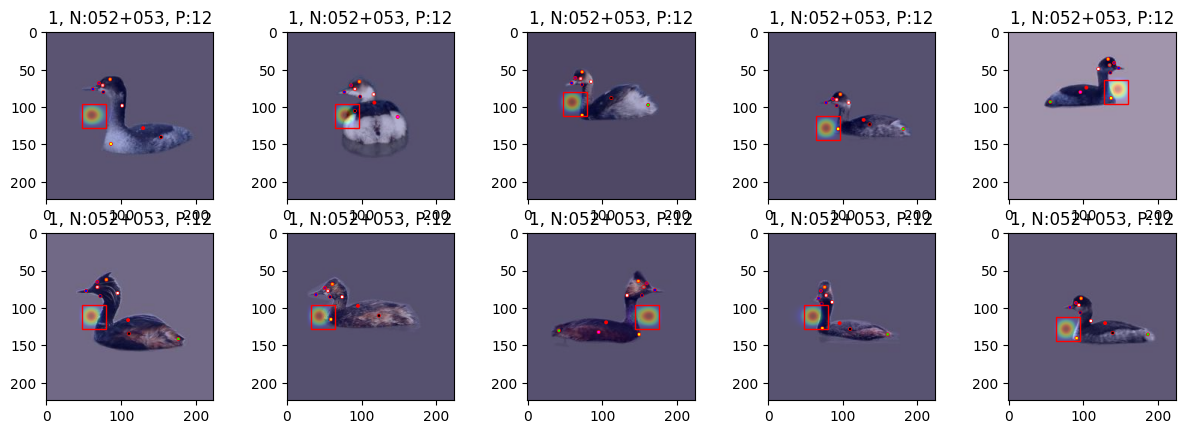

In [17]:
import os
import random
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import matplotlib.patches as patches

part_color_map = {
    1: 'red',
    2: 'blue',
    3: 'green',
    4: 'yellow',
    5: 'orange',
    6: 'purple',
    7: 'pink',
    8: 'brown',
    9: 'black',
    10: 'white',
    11: 'gray',
    12: 'cyan',
    13: 'magenta',
    14: 'lime',
    15: 'navy'
}

# Function to draw parts on an image
def draw_parts(img, part_locs):
    draw = ImageDraw.Draw(img)
    img_width, img_height = img.size
    for part_id, x_norm, y_norm, visible in part_locs:
        if visible:
            x = int(x_norm * img_width)
            y = int(y_norm * img_height)
            draw.ellipse((x - 2, y - 2, x + 2, y + 2), outline="red", fill=part_color_map[part_id])
    return img

def add_heatmap(latent_activation, input_image):
    """
    latent_activation -> np array of shape (H, W)
    input_image -> PIL image of size (H, W)
    """
#     pdb.set_trace()
    
    image_a = latent_activation#.cpu().numpy()
    image_a = (image_a - image_a.min()) / (image_a.max() - image_a.min())
    
    input_image = np.array(input_image)
    image_b = (input_image - input_image.min()) / (input_image.max() - input_image.min())
#     image_b = input_image.permute(1, 2, 0).cpu().numpy()
    
    reshaped_image_a = np.array(Image.fromarray((image_a * 255).astype('uint8'))\
                                .resize((input_image.shape[0], input_image.shape[1])))
    normalized_heatmap = (reshaped_image_a - np.min(reshaped_image_a)) / (np.max(reshaped_image_a) - np.min(reshaped_image_a))
    
    heatmap_colormap = plt.get_cmap('jet')
    heatmap_colored = heatmap_colormap(normalized_heatmap)
    
    heatmap_colored_uint8 = (heatmap_colored[:, :, :3] * 255).astype(np.uint8)
    image_a_heatmap_pillow = Image.fromarray(heatmap_colored_uint8)
    image_b_pillow = Image.fromarray((image_b * 255).astype('uint8'))
#     pdb.set_trace()
    result_image = Image.blend(image_b_pillow, image_a_heatmap_pillow, alpha=0.3)
    
    return result_image

# Function to display images in a Jupyter notebook
def display_images(images, titles=None, bboxes=None):
    plt.figure(figsize=(15, 10))
    for i, img in enumerate(images, 1):
        plt.subplot(4, 5, i)
        plt.imshow(img)

        if bboxes:
            h_min_224, h_max_224, w_min_224, w_max_224 = bboxes[i-1]
            rect = patches.Rectangle((w_min_224, h_min_224), w_max_224 - w_min_224, h_max_224 - h_min_224,
                                 linewidth=1, edgecolor='r', facecolor='none')
            ax = plt.gca()
            ax.add_patch(rect)
        if titles:
            plt.title(titles[i-1])
        # plt.axis('off')
        
    plt.show()
    
# Randomly sample 10 images
sampled_images = random.sample((dict_node_wise_df['052+053'][(dict_node_wise_df['052+053']['prototype'] == 12) & (dict_node_wise_df['052+053']['leaf'] == '050')][["node", "prototype", 'img name', 'scores', 'h_min_224', 'h_max_224', 'w_min_224', 'w_max_224', 'latent_activation']].values).tolist(), 10)
sampled_images = sorted(sampled_images, key=lambda x: x[3])[::-1]
# sampled_images = random.sample((df[(df['prototype'] == 10) & (df['leaf'] == '001')][["node", "prototype", 'img name', 'scores', 'h_min_224', 'h_max_224', 'w_min_224', 'w_max_224', 'latent_activation']].values).tolist(), 10)
# sampled_images = random.sample((df[df['max_part_activation'] > 0.7][['img_filename', 'img_path', 'activation']].values).tolist(), 1)
# sampled_images = random.sample((df[['img_filename', 'img_path', 'activation']].values).tolist(), 1)
# print(sampled_images)


# Draw parts or heatmap on the images
sampled_images_with_parts = []
sampled_images_bboxes = []
sampled_images_titles = []
for node_name, prototype_idx, img_path, score, h_min_224, h_max_224, w_min_224, w_max_224, latent_activation in sampled_images:
    # image_path = os.path.join(img_path)
    img_filename = ntpath.basename(img_path)
    img_index = img_filename_to_index[img_filename]
    image = Image.open(img_path)
    # pdb.set_trace()
    image = add_heatmap(latent_activation.clone().detach().cpu().numpy(), image)
    image = draw_parts(image, image_part_locs[img_index])
    sampled_images_with_parts.append(image)
    sampled_images_bboxes.append((h_min_224, h_max_224, w_min_224, w_max_224))
    sampled_images_titles.append(f'{round(score)}, N:{node_name}, P:{prototype_idx}')


# # Randomly sample 10 images
# sampled_images = random.sample((df[["node", "prototype", 'img name', 'scores', 'h_min_224', 'h_max_224', 'w_min_224', 'w_max_224']].values).tolist(), 10)
# # sampled_images = random.sample((df[(df['prototype'] == 10) & (df['leaf'] == '001')][["node", "prototype", 'img name', 'scores', 'h_min_224', 'h_max_224', 'w_min_224', 'w_max_224']].values).tolist(), 10)
# # sampled_images = random.sample((df[df['max_part_activation'] > 0.7][['img_filename', 'img_path', 'activation']].values).tolist(), 1)
# # sampled_images = random.sample((df[['img_filename', 'img_path', 'activation']].values).tolist(), 1)
# # print(sampled_images)


# # Draw parts or heatmap on the images
# sampled_images_with_parts = []
# sampled_images_bboxes = []
# sampled_images_titles = []
# for node_name, prototype_idx, img_path, score, h_min_224, h_max_224, w_min_224, w_max_224 in sampled_images:
#     # image_path = os.path.join(img_path)
#     img_filename = ntpath.basename(img_path)
#     img_index = img_filename_to_index[img_filename]
#     image = Image.open(img_path)
#     # pdb.set_trace()
#     # image = add_heatmap(latent_activation.clone().detach().cpu().numpy(), image)
#     image = draw_parts(image, image_part_locs[img_index])
#     sampled_images_with_parts.append(image)
#     sampled_images_bboxes.append((h_min_224, h_max_224, w_min_224, w_max_224))
#     sampled_images_titles.append(f'{round(score)}, N:{node_name}, P:{prototype_idx}')

# Display the images with parts
display_images(sampled_images_with_parts, titles=sampled_images_titles, bboxes=sampled_images_bboxes)



# HPnet

In [63]:
run_path = "/home/harishbabu/projects/HPnet_lambda/saved_models/024_vgg19-14_cub18-224-prop-resized_10protos_kaiming-normal_batch=80_push-every=5_joint-eps=50_with-pretraining_CEDA=True"

In [64]:
csv_folder_path = os.path.join(run_path, 'node_wise_top10')
sample_csv_file = os.listdir(csv_folder_path)[0]
sample_image_path = pd.read_csv(os.path.join(csv_folder_path, sample_csv_file))['img name'][0]
print(sample_image_path)

/projects/ml4science/harishbabu/data/CUB_18_hpnet_224/dataset_imgnet_hpnet_bb_crop/valid/cub_033_Yellow_billed_Cuckoo/Yellow_Billed_Cuckoo_0043_26492.jpg


In [65]:
parts_name_path = '/projects/ml4science/harishbabu/data/CUB_200_2011/parts/parts.txt'
imgs_id_path = '/projects/ml4science/harishbabu/data/CUB_200_2011/images_cub.txt'

In [66]:
image_meta_file_base_path = os.path.dirname(os.path.dirname(sample_image_path))
image_meta_filepath = os.path.join(image_meta_file_base_path, 'image_meta_file.json')

import json

with open(image_meta_filepath, 'r') as file:
    image_meta = json.load(file)    
print(image_meta)

{'cropped': True, 'padded': True, 'segmented': True, 'imagenet_background': True, 'sample_class_name': 'cub_001_Black_footed_Albatross'}


In [67]:
dataset_path = '/projects/ml4science/harishbabu/data/CUB_200_2011/'  # part locs are loaded from here

if image_meta['cropped'] and image_meta['padded']:
    part_locs_file = os.path.join(dataset_path, 'parts', 'part_locs_normalized_after_cropped_after_padded.txt') 
    print('*-'*40)
    print('\t\t\tIMPORTANT: Using CROPPED and PADDED part locations')
    print('*-'*40)
elif not image_meta['cropped'] and image_meta['padded']:
    part_locs_file = os.path.join(dataset_path, 'parts', 'part_locs_normalized_after_padded.txt') 
    print('*-'*40)
    print('\t\t\tIMPORTANT: Using NOT CROPPED and PADDED part locations')
    print('*-'*40)
elif image_meta['cropped'] and not image_meta['padded']:
    part_locs_file = os.path.join(dataset_path, 'parts', 'part_locs_normalized_after_cropped.txt') 
    print('*-'*40)
    print('\t\t\tIMPORTANT: Using CROPPED and NOT PADDED part locations')
    print('*-'*40)
elif not image_meta['cropped'] and not image_meta['padded']:
    part_locs_file = os.path.join(dataset_path, 'parts', 'part_locs_normalized.txt') 
    print('*-'*40)
    print('\t\t\tIMPORTANT: Using NOT CROPPED and NOT PADDED part locations')
    print('*-'*40)

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
			IMPORTANT: Using CROPPED and PADDED part locations
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


In [68]:
import ntpath
NUM_PARTS = 15
images_file = os.path.join(dataset_path, 'images_cub.txt')

# Read the image index to filename mapping
img_filename_to_index = {} # image filename to image index
with open(images_file, 'r') as file:
    for line in file:
        index, filename = line.strip().split()
        img_filename = ntpath.basename(filename)
        img_filename_to_index[img_filename] = int(index)

# Load part locations
image_part_locs = defaultdict(list)
with open(part_locs_file, 'r') as file:
    for line in file:
        parts = line.strip().split()
        image_index, part_id, x, y, visible = int(parts[0]), int(parts[1]), float(parts[2]), float(parts[3]), bool(float(parts[4]))
        image_part_locs[image_index].append((part_id, x, y, visible))

In [49]:
# def unshuffle_dataloader(dataloader):
#     if type(dataloader.dataset) == ImageFolder:
#         dataset = dataloader.dataset
#     else:
#         dataset = dataloader.dataset.dataset.dataset
#     new_dataloader = DataLoader(
#         dataset=dataset,
#         batch_size=dataloader.batch_size,
#         shuffle=False,
#         num_workers=dataloader.num_workers,
#         pin_memory=dataloader.pin_memory,
#         drop_last=dataloader.drop_last,
#         timeout=dataloader.timeout,
#         worker_init_fn=dataloader.worker_init_fn,
#         multiprocessing_context=dataloader.multiprocessing_context,
#         generator=dataloader.generator,
#         prefetch_factor=dataloader.prefetch_factor,'
#         persistent_workers=dataloader.persistent_workers
#     )
#     return new_dataloader

# projectloader = unshuffle_dataloader(projectloader)
# print(projectloader.batch_size)

In [69]:
list_csvfile_topk = []
list_node_wise_df = []
dict_node_wise_df = {}

node_wise_purity = []
for csvfile_topk in os.listdir(csv_folder_path):
    node_name = csvfile_topk.split('_')[0]
    node = root.get_node(node_name)
    csvfile_topk = os.path.join(csv_folder_path, csvfile_topk)
    list_csvfile_topk.append(csvfile_topk)
    dict_node_wise_df[node.name] = pd.read_csv(csvfile_topk)
    # node_purity = eval_prototypes_cub_parts_csv_nodewise(node, csvfile_topk, part_locs_file, parts_name_path, \
    #                           imgs_id_path, 'projectloader_topk_'+str(epoch), args, desc_threshold=0.2)
    node_purity = eval_prototypes_cub_parts_csv_nodewise_maxmin(node, csvfile_topk, part_locs_file, parts_name_path, \
                              imgs_id_path, 'projectloader_topk_'+str(epoch), args, desc_threshold=0.2)
    node_wise_purity.append(node_purity)

Number of prototypes in parts_presences:  20
Part-related (purity>0.5): 1
Node: 033+031 | Child: cub_033_Yellow_billed_Cuckoo | Purity: 0.3167857142857143 | Num desc: 1 | Num protos: 10
	Proto: 1 0.3333333333333333
	Proto: 9 0.5
	Proto: 6 0.125
	Proto: 7 0.375
	Proto: 0 0.4
	Proto: 8 0.4
	Proto: 4 0.125
	Proto: 3 0.1
	Proto: 5 0.6666666666666666
	Proto: 2 0.14285714285714285
Node: 033+031 | Child: cub_031_Black_billed_Cuckoo | Purity: 0.21297619047619049 | Num desc: 1 | Num protos: 10
	Proto: 14 0.2
	Proto: 11 0.2222222222222222
	Proto: 17 0.2857142857142857
	Proto: 15 0.0
	Proto: 12 0.2857142857142857
	Proto: 10 0.2222222222222222
	Proto: 16 0.125
	Proto: 19 0.2222222222222222
	Proto: 13 0.16666666666666666
	Proto: 18 0.4
Number of prototypes in parts_presences:  20
Part-related (purity>0.5): 0
Node: 053+050 | Child: cub_053_Western_Grebe | Purity: 0.18222222222222223 | Num desc: 1 | Num protos: 10
	Proto: 1 0.2
	Proto: 9 0.0
	Proto: 6 0.1
	Proto: 7 0.2
	Proto: 0 0.1111111111111111
	P

In [70]:
print(np.mean(node_wise_purity))

0.22804605366079805


In [52]:
node_wise_purity

[0.21484126984126983,
 0.1227777777777778,
 0.17950396825396825,
 0.17972222222222223,
 0.1865277777777778,
 0.19394841269841273,
 0.19041666666666668,
 0.0314484126984127,
 0.11111111111111112,
 0.017361111111111112,
 0.13444444444444445,
 0.13999999999999999,
 0.12166666666666666,
 0.14666666666666667,
 0.0,
 0.13428571428571429,
 0.24930555555555559]